In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [6]:
df = pd.read_csv(f'../data/market_integrates_100.csv')
print(df)


     time  product  characteristic1  characteristic2      price  \
0       1        1         5.433865         5.433865   2.741721   
1       1        2         5.907737         5.907737   2.324290   
2       1        3         5.943911         5.943911   2.266723   
3       1        4         5.329441         5.329441   2.883364   
4       1        5         5.083033         5.083033   3.019253   
..    ...      ...              ...              ...        ...   
995   100        6         5.360283         5.360283  13.369821   
996   100        7         5.958183         5.958183  11.987793   
997   100        8         5.184745         5.184745  15.139601   
998   100        9         5.223118         5.223118  15.122381   
999   100       10         5.019838         5.019838  16.462569   

     marginal_cost    mshare   profits   markups  e_quantity   capital  \
0         0.781560  0.095718  0.187623  3.508012   47.858965  0.912243   
1         0.532653  0.081786  0.146531  4.36360

In [ ]:
np.random.seed(300)

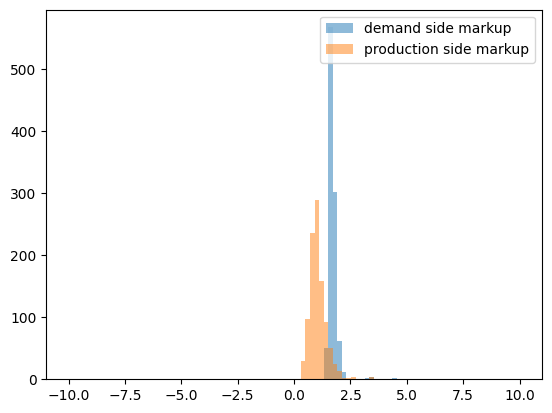

In [7]:
# Plotting the markups 

bins = np.linspace(-10, 10, 100)


plt.hist(df['markups'], bins, alpha=0.5, label='demand side markup')
# plt.hist(df['mu_o'], bins, alpha=0.5, label='optimal')
plt.hist(df['mu_q'], bins, alpha=0.5, label='production side markup')
plt.legend(loc='upper right')
plt
plt.show()


In [9]:
# Some checks for the marginal cost computation 
def compute_marginal_cost(wage, theta_L, theta_0, n_consumers, market_shares, t, productivity_shocks, 
                          theta_K, capital):
    """ Function to compute the marginal cost as a function of the 
    equilibiurm quantity produced in the market in each time period

    Args:
        market_shares (_float_): the market shares for that one particular period 
        t (_int_): the time period for which the cost has to be computed 

    Returns:
        _float_: the marginal cost for the time period t 
    """
    MC = (wage*(1/theta_L)*(n_consumers * market_shares/(np.exp(theta_0 + productivity_shocks[:,t])*
        capital[:,t]**theta_K))**((1-theta_L)/theta_L) *
        (1/np.exp(theta_0 + productivity_shocks[:,t])*
        capital[:,t]**theta_K))
    return MC



In [12]:

K = np.ones((2, 1))*(7/10)
prod = np.random.normal(0, 1, (2, 1))

print(K)
print(prod)

for t in range(0, 2, 1):
    mc = compute_marginal_cost(1, 0.3, 1, 10, 0.05, t, prod, 0.7, K)

[[0.7]
 [0.7]]
[[ 1.44103308]
 [-1.23551195]]


IndexError: index 1 is out of bounds for axis 1 with size 1